# Baseline Model

Using TensorFlow backend.


X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 3s - loss: 2.4571 - acc: 0.0983 - val_loss: 2.4018 - val_acc: 0.0540
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3309 - acc: 0.1100 - val_loss: 2.3329 - val_acc: 0.1210
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3152 - acc: 0.1140 - val_loss: 2.3060 - val_acc: 0.0540
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3003 - acc: 0.1320 - val_loss: 2.2748 - val_acc: 0.0650
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.1980 - acc: 0.2037 - val_loss: 1.9357 - val_acc: 0.4060
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 1.9572 - acc: 0.3205 - val_loss: 1.5149 - val_acc: 0.5750
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 1.7197 - acc: 0.4040 - val_loss: 1.2542 - va

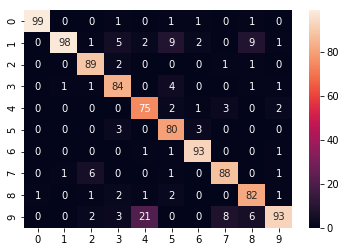

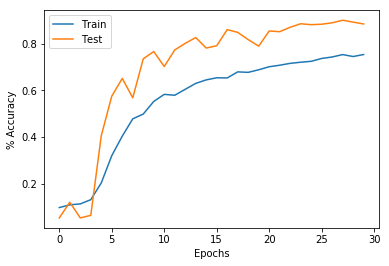

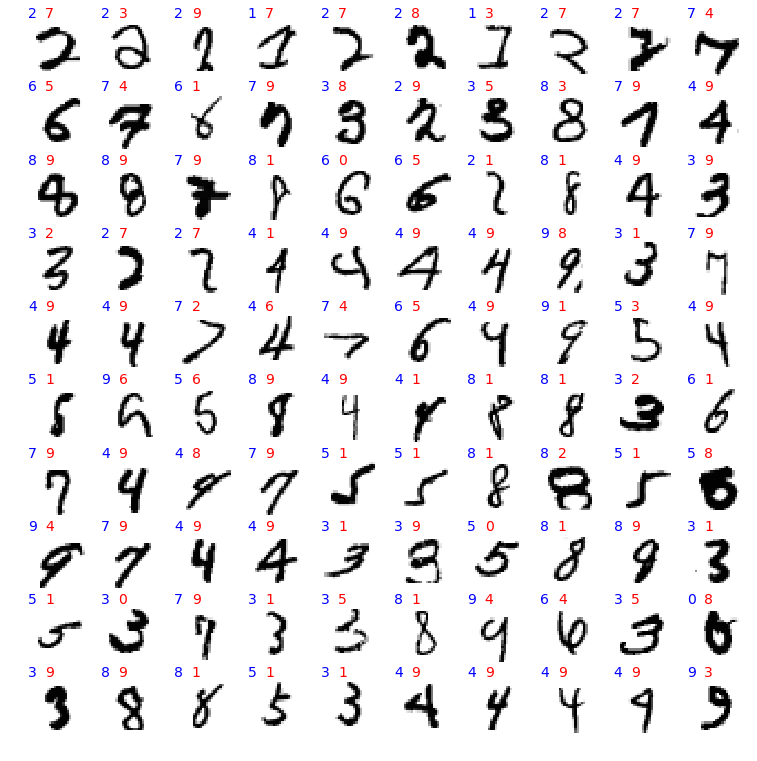

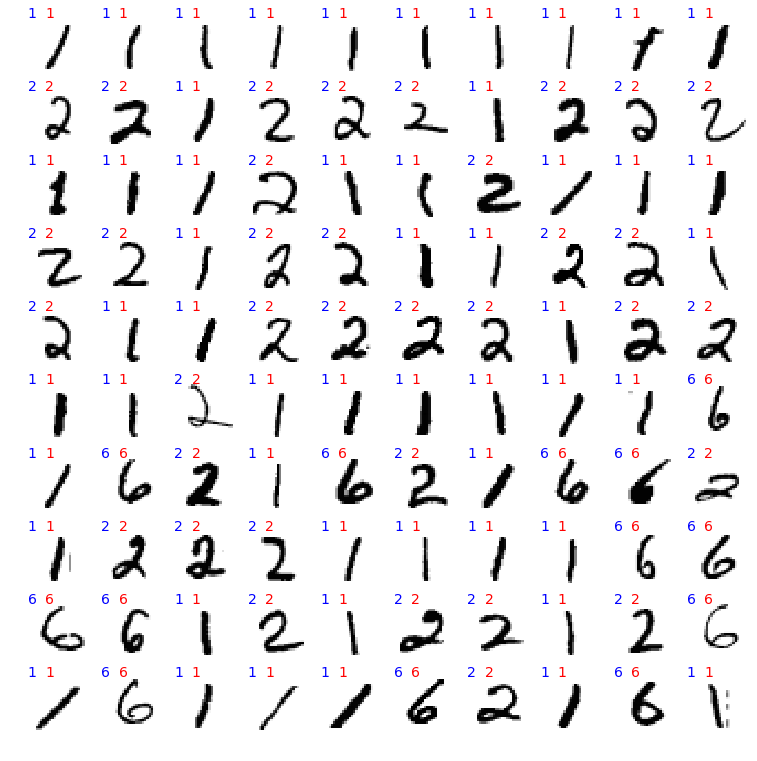

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 16)          0         
__________

In [1]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn

# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'relu', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'relu', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

0.956


# MaxPooling 

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 3s - loss: 2.4355 - acc: 0.1025 - val_loss: 2.3464 - val_acc: 0.1110
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3266 - acc: 0.1147 - val_loss: 2.3135 - val_acc: 0.1000
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3147 - acc: 0.1083 - val_loss: 2.3212 - val_acc: 0.0700
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3102 - acc: 0.1080 - val_loss: 2.3168 - val_acc: 0.0870
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.2975 - acc: 0.1292 - val_loss: 2.5194 - val_acc: 0.0540
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 2.1897 - acc: 0.2052 - val_loss: 1.8233 - val_acc: 0.5460
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 1.9036 - acc: 0.3330 - val_loss: 1.4434 - va

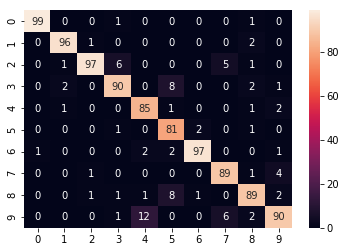

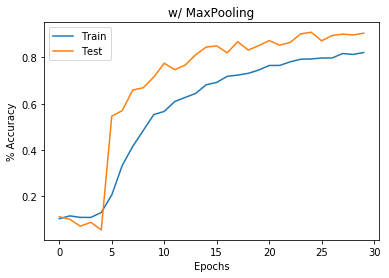

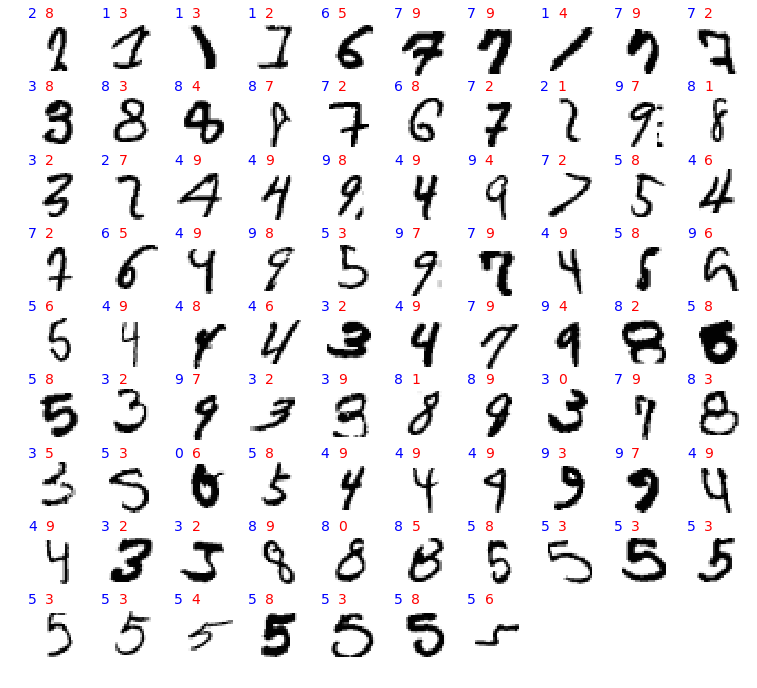

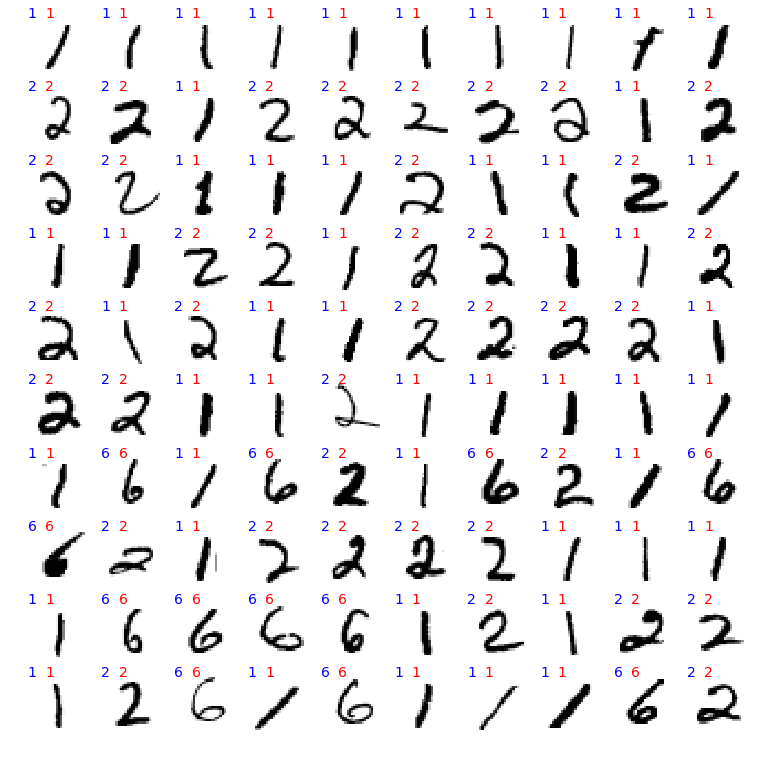

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
activation_4 (Activation)    (None, 5, 5, 16)          0         
__________

In [2]:
# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'relu', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'relu', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('w/ MaxPooling')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

# Maxpooling, sigmoid activation

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 4s - loss: 2.4724 - acc: 0.0930 - val_loss: 2.3314 - val_acc: 0.1000
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3133 - acc: 0.1085 - val_loss: 2.3426 - val_acc: 0.0700
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3105 - acc: 0.1005 - val_loss: 2.3229 - val_acc: 0.0910
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3080 - acc: 0.1035 - val_loss: 2.3132 - val_acc: 0.1000
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.3093 - acc: 0.1017 - val_loss: 2.3133 - val_acc: 0.1000
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 2.3083 - acc: 0.1072 - val_loss: 2.3041 - val_acc: 0.1110
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 2.3081 - acc: 0.1032 - val_loss: 2.3402 - va

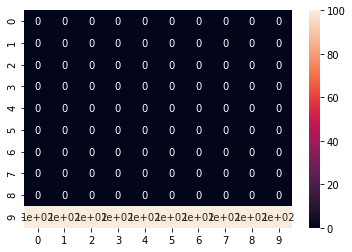

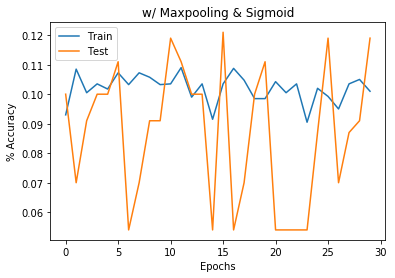

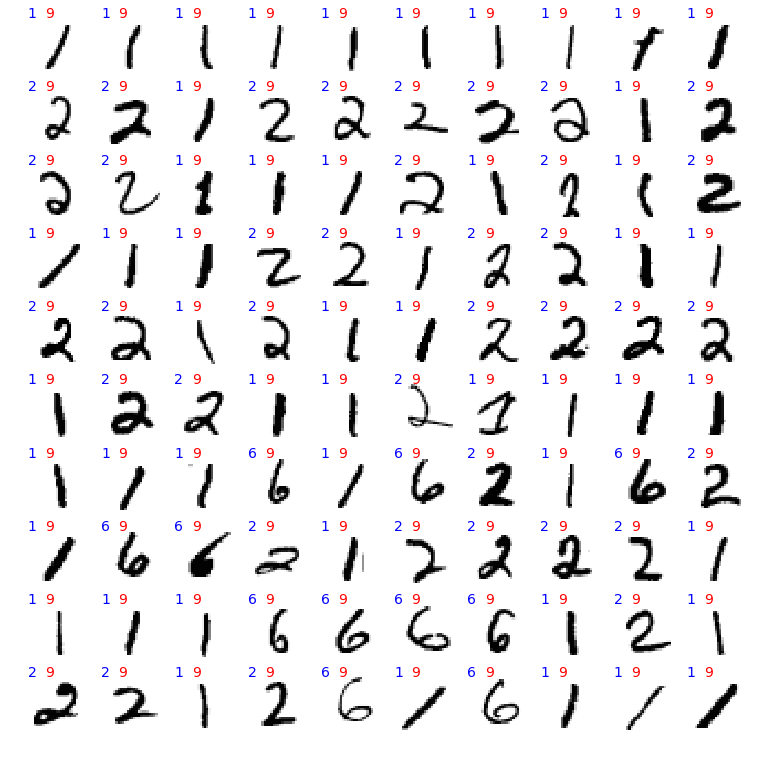

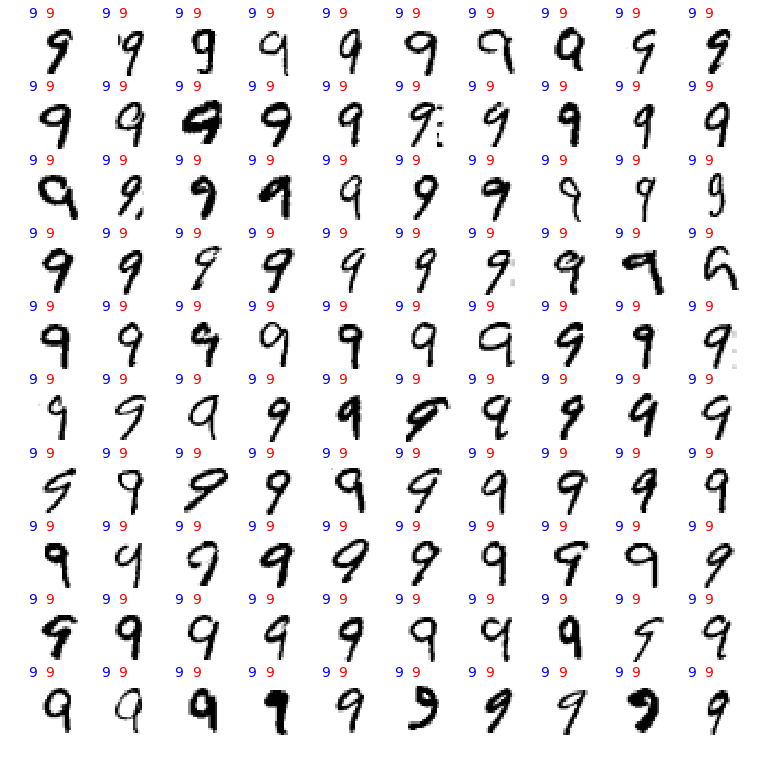

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 16)          0         
__________

In [3]:
# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'sigmoid',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'sigmoid', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'sigmoid', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('w/ Maxpooling & Sigmoid')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

# MaxPooling, Tanh activation on Conv Layers

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 5s - loss: 2.4312 - acc: 0.1030 - val_loss: 2.3024 - val_acc: 0.1490
Epoch 2/30
4000/4000 [==============================] - 5s - loss: 2.2709 - acc: 0.1425 - val_loss: 2.0731 - val_acc: 0.2230
Epoch 3/30
4000/4000 [==============================] - 5s - loss: 1.7402 - acc: 0.4077 - val_loss: 1.1271 - val_acc: 0.7380
Epoch 4/30
4000/4000 [==============================] - 5s - loss: 1.2445 - acc: 0.5870 - val_loss: 0.7407 - val_acc: 0.8020
Epoch 5/30
4000/4000 [==============================] - 4s - loss: 0.9802 - acc: 0.6657 - val_loss: 0.5593 - val_acc: 0.8610
Epoch 6/30
4000/4000 [==============================] - 4s - loss: 0.8147 - acc: 0.7308 - val_loss: 0.4953 - val_acc: 0.8520
Epoch 7/30
4000/4000 [==============================] - 4s - loss: 0.7261 - acc: 0.7623 - val_loss: 0.4216 - va

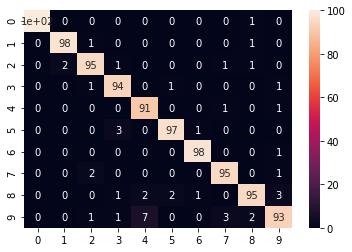

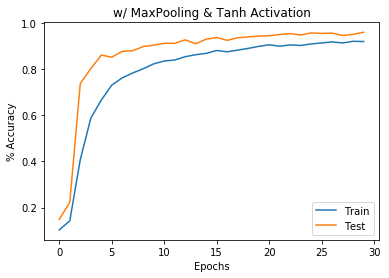

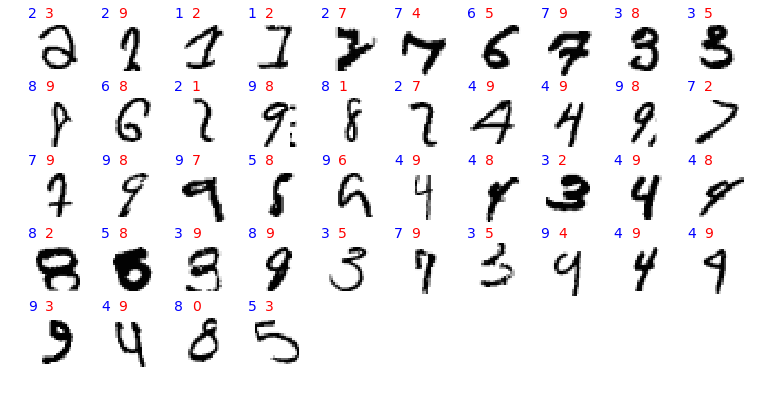

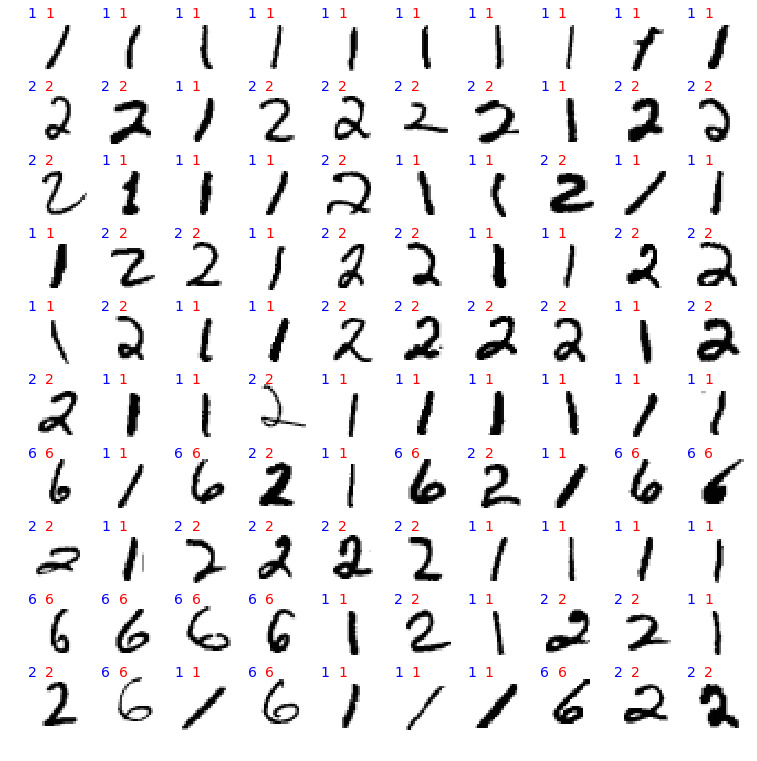

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_6 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
activation_8 (Activation)    (None, 5, 5, 16)          0         
__________

In [6]:
# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'tanh',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'tanh', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'tanh', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('w/ MaxPooling & Tanh Activation')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

# Github Best Performance

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 4s - loss: 1.9385 - acc: 0.3327 - val_loss: 1.4378 - val_acc: 0.7490
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 1.1177 - acc: 0.6270 - val_loss: 0.7935 - val_acc: 0.8710
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 0.7723 - acc: 0.7445 - val_loss: 0.5715 - val_acc: 0.8990
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 0.6329 - acc: 0.7870 - val_loss: 0.4556 - val_acc: 0.9120
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 0.5153 - acc: 0.8332 - val_loss: 0.3614 - val_acc: 0.9400
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 0.4451 - acc: 0.8575 - val_loss: 0.3148 - val_acc: 0.9460
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 0.4041 - acc: 0.8715 - val_loss: 0.2667 - va

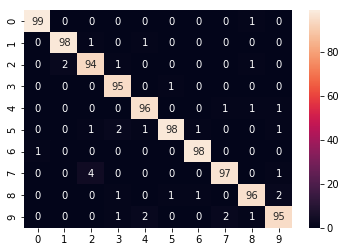

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


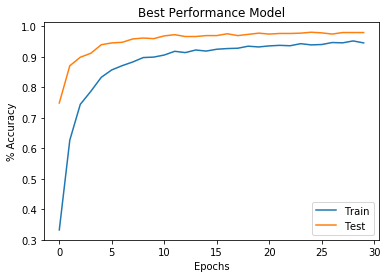

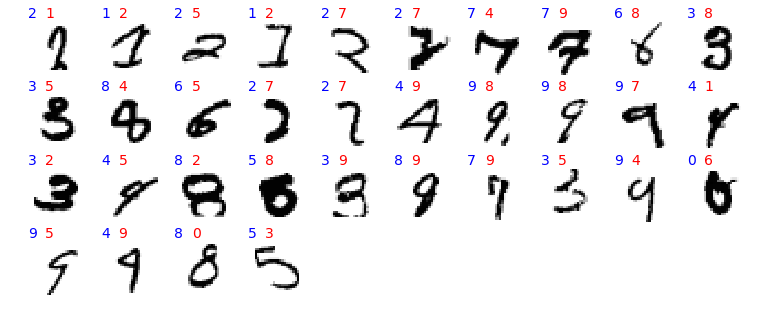

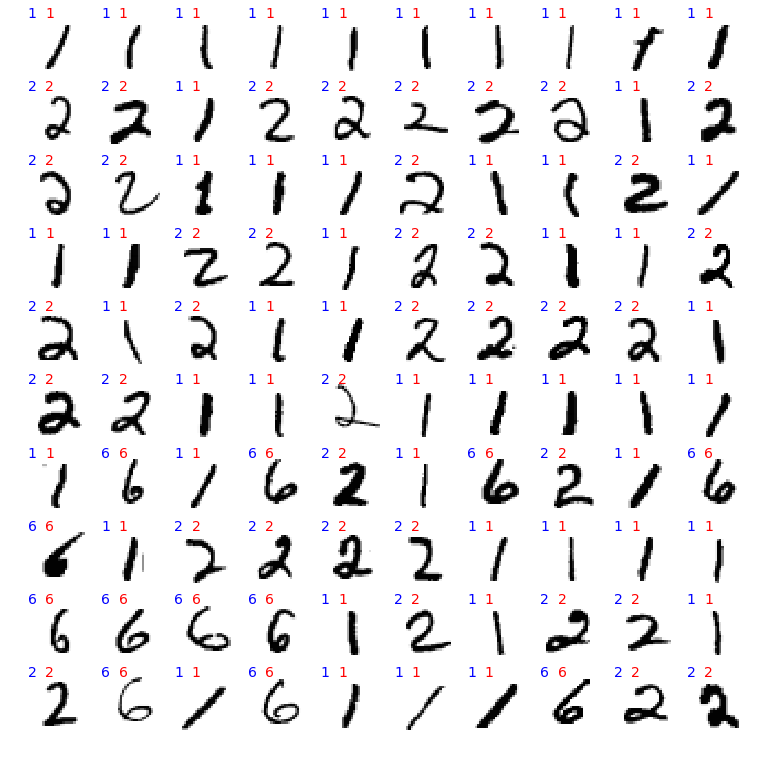

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 8)         1608      
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 8)         0         
__________

In [4]:
# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(8, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))
model.add(Dropout(0.25))
# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2), strides =(2,2)))
#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Roughly equivalent to C3
model.add(Convolution2D(8, (5, 5), activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))

# Roughly equivalent to F6
model.add(Dense(80, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)
y_Pred = model.predict_proba(X_test) 

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots
print(fit.history.keys())  
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('Best Performance Model')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

# GitHub Overfit

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 7s - loss: 1.1878 - acc: 0.6130 - val_loss: 0.5714 - val_acc: 0.8500
Epoch 2/30
4000/4000 [==============================] - 7s - loss: 0.4160 - acc: 0.8700 - val_loss: 0.2897 - val_acc: 0.9310
Epoch 3/30
4000/4000 [==============================] - 7s - loss: 0.2877 - acc: 0.9095 - val_loss: 0.1923 - val_acc: 0.9600
Epoch 4/30
4000/4000 [==============================] - 7s - loss: 0.1873 - acc: 0.9423 - val_loss: 0.1357 - val_acc: 0.9650
Epoch 5/30
4000/4000 [==============================] - 7s - loss: 0.1599 - acc: 0.9515 - val_loss: 0.1302 - val_acc: 0.9640
Epoch 6/30
4000/4000 [==============================] - 6s - loss: 0.1407 - acc: 0.9588 - val_loss: 0.1289 - val_acc: 0.9700
Epoch 7/30
4000/4000 [==============================] - 6s - loss: 0.1120 - acc: 0.9625 - val_loss: 0.1016 - va

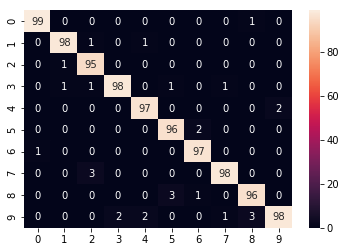

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


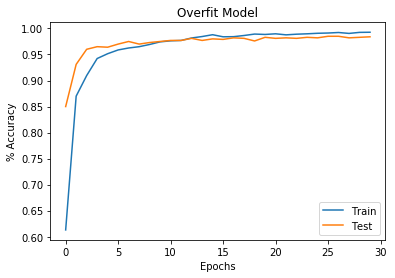

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_5 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        12832     
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 10, 32)        0         
__________

In [5]:
# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(16, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))
model.add(Dropout(0.2))
# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2), strides =(2,2)))
#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# Roughly equivalent to C3
model.add(Convolution2D(32, (5, 5), activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))

# Roughly equivalent to F6
model.add(Dense(200, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)
y_Pred = model.predict_proba(X_test) 

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots
print(fit.history.keys())  
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('Overfit Model')
plt.show()

model.summary()